In [3]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle   # 打乱样本数据

#读取数据文件
df = pd.read_csv("E:/FIle/dppdf/data/boston.csv",header=0)

#显示数据摘要描述信息
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

# 通过 Pandas 导入数据  
数据结构自动转换为numpy的多维阵列  

csv 文件加载能够自动识别列头，支持列的直接寻址  

能够从csv文件、文本文件、MS Excel、SQL数据库，HDF5格式获取信息

In [4]:
# 显示所有数据
print(df)

        CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0   11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0   11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0   11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  

# 多元线性回归模型
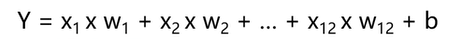

结果由不同特征的输入值和对应的权重相乘求和，加上偏置项计算求解

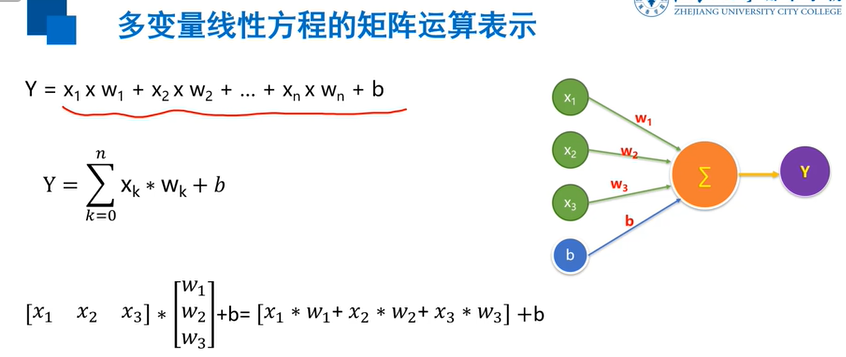

# 相关线代
标量 scalar  向量 vector 矩阵 matrix


In [5]:
# 向量是一个有序的数字数组
vector_value=[1,2,3]          # 列表
vector_np = np.array(vector_value)    #转换为np中的数组array
print(vector_np,vector_np.shape)  # shape 显示为一维数组， 


[1 2 3] (3,)


In [6]:
# 矩阵是一个有序的二维数组，它有俩个索引。第一个指向该行，第二个指向该列
matrix_list = [[1,2,3],[4,5,6]]
matrix_np=np.array(matrix_list)
print('matrix_list=',matrix_list,'\n','matrix_np=',matrix_np,\
      '\n''matrix_np,shape=',matrix_np.shape)

matrix_list= [[1, 2, 3], [4, 5, 6]] 
 matrix_np= [[1 2 3]
 [4 5 6]] 
matrix_np,shape= (2, 3)


In [7]:
# 行向量的矩阵表示
vector_row = np.array([[1,2,3]])
print(vector_row,'shape=',vector_row.shape)

[[1 2 3]] shape= (1, 3)


In [8]:
# 列向量的矩阵表示
vector_column= np.array([[4],[5],[6]])
print(vector_column,'shape=',vector_column.shape)

[[4]
 [5]
 [6]] shape= (3, 1)


In [ ]:
# 矩阵与标量运算
matrix_a = np.array([[1,2,3],[4,5,6]])
print(matrix_a,'shape=',matrix_a.shape)
matrix_b = matrix_a*2
print(matrix_b,'shape=',matrix_b.shape)
matrix_c = matrix_a+2
print(matrix_c,'shape=',matrix_c.shape)


In [ ]:
#矩阵间的运算
print(matrix_a+matrix_b)

In [ ]:
matrix_a = np.array([[1,2,3],
                   [4,5,6]])
matrix_b = np.array([[-1,-2,-3],
                     [-4,-5,-6]
])
print(matrix_a+matrix_b)  # 矩阵相加
print(matrix_a*matrix_b)   # 矩阵点积， 与np.multiply等价  俩个矩阵行列数必须相等
print(np.multiply(matrix_a,matrix_b))

In [ ]:
# 矩阵叉乘   行列有要求
matrix_a = np.array([[1,2,3],
                   [4,5,6]])
matrix_b = np.array([[1,2,3,4],
                    [2,1,2,1],
                    [2,0,3,1]])
np.matmul(matrix_a,matrix_b)   

In [ ]:
# 矩阵转置
matrix_a = np.array([[1,2,3],
                   [4,5,6]])
print(matrix_a,'shape=',matrix_a.shape,'\n',matrix_a.T,'.Tshape=',matrix_a.T.shape)

In [ ]:
#reshape 
vector_row=np.array([1,2,3])
vector_column=vector_row.reshape(3,1)
print(vector_row,'shape=',vector_row.shape,'\n',vector_column,'reshape=',vector_column.shape)

In [ ]:

df = np.array(df)
print(df)
for i in range(12):
    df[:,i]=df[:,i]/(df[:,i].max()-df[:,i].min())
x_data = df[:,:12]    # 前12列特征数据

y_data = df[:,12]    # 为最后一列标签数据

In [ ]:
print(x_data,'\nshape=',x_data.shape)
print(y_data,'\nshape=',y_data.shape)

# 定义训练数据占位符

In [ ]:
x = tf.placeholder(tf.float32,[None,12],name="X")  # 12个特征数据（12列）
y = tf.placeholder(tf.float32,[None,1],name="Y")  # 1个标签数据（1列）
# shape中 None表示行的数量未知 在实际训练时决定一次带入多少行样本，
# 从一个样本的随机SDG到批量SDG都可以

# 定义模型结构

In [ ]:
# 定义了一个命名空间
with tf.name_scope("Model"):
    # w 初始化值为shape=（12，1）的随机数
    w = tf.Variable(tf.random_normal([12,1],stddev=0.01), name="W")
    #  stddev 正态分布标准差
    # b初始化值为1.0
    b = tf.Variable(1.0,name= "b")
    # w和x是矩阵相乘，用matmul，不能用multiply或者*
    def model(x,w,b):
        return tf.matmul(x,w)+b
    # 预测计算操作，前向计算节点
    pred = model(x,w,b)

# 设置训练超参数

In [ ]:
# 迭代轮次
train_epochs=150
# 学习率
learning_rate = 0.01

#  定义均方差的损失函数

In [ ]:
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred,2))     # 均方误差
    # pow 平方函数

#  选择优化器

In [ ]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

# 模型训练

In [ ]:
# 声明会话
sess = tf.Session()
# 定义初始化变量的操作
init = tf.global_variables_initializer()


#为TensorBoard做准备
# 设置日志存储目录
logdir ='e:/log'
# 创建一个操作， 用于记录损失值loss，后面再TensorBoard中SCALARS栏中可见
sum_loss_op = tf.summary.scalar("loss",loss_function)
# 把所有需要记录摘要日志文件的合并，方便一次性写入
merged = tf.summary.merge_all()
# 启动会话
sess.run(init)
# 创建摘要writer，将计算图写入摘要文件，后面再TensorBoard中GRAPHS栏可见
writer = tf.summary.FileWriter(logdir,sess.graph)

# 迭代训练


In [ ]:
loss_list = []

for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs,ys in zip(x_data,y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        
        _,summart_str, loss = sess.run([optimizer,sum_loss_op ,loss_function],feed_dict={x:xs,y:ys})
        writer.add_summary(summart_str,epoch)
        loss_sum = loss_sum +loss
        
    # 打乱数据顺序,
    xvalues, yvalues = shuffle(x_data,y_data)
    
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    loss_list.append(loss_average)
    print("epoch=",epoch+1,"loss=",loss_average,"b=",b0temp,"w=",w0temp)
  
    

In [ ]:
plt.plot(loss_list)

#  梯度下降
## 考虑不同特征值取值范围大小的影响
### 归一化 
特征值/（特征值最大值-特征值最小值）

# 模型应用

In [ ]:
n= 350
x_test = x_data[n]
x_test = x_test.reshape(1,12)
predict = sess.run(pred, feed_dict={x:x_test})
print("预测值：%f" %predict)

target = y_data[n]
print("标签值：%f" %target)

In [ ]:
n=np.random.randint(506)
print(n)
x_test = x_data[n]
x_test = x_test.reshape(1,12)
predict = sess.run(pred, feed_dict={x:x_test})
print("预测值：%f" %predict)

target = y_data[n]
print("标签值：%f" %target)